In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from ranfor_pspfgp import Ranfor_pspfgp

In [2]:
PATH = PATH = "../../../../data-mining-file/"
levels = ("0-4","5-12","13-22")

In [3]:
with open(PATH+"train_dfs_std_pca.pickle", "rb") as f:
    train_dfs_std_pca = pickle.load(f)
    
with open(PATH+"train_dfs_std_vif.pickle", "rb") as f:
    train_dfs_std_vif = pickle.load(f)
    
with open(PATH+"train_dfs_min_max.pickle", "rb") as f:
    train_dfs_min_max = pickle.load(f)

targets = pd.read_csv(PATH+"target.csv")

In [4]:
targets

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1
...,...,...,...,...
424111,22100215342220508_q18,1,22100215342220508,18
424112,22100215460321130_q18,1,22100215460321130,18
424113,22100217104993650_q18,1,22100217104993650,18
424114,22100219442786200_q18,1,22100219442786200,18


## Model using train_dfs_std_vif

In [5]:
train_dfs_std_vif = pd.concat(list(train_dfs_std_vif.values()),axis=0)
train_dfs_std_vif.sort_index()

,level_group,event_name_nunique,fqid_nunique,room_fqid_nunique,elapsed_time_mean,level_mean,room_coor_x_mean,screen_coor_x_mean,elapsed_time_std,level_std,...,navigate_click_sum,person_click_sum,cutscene_click_sum,object_click_sum,map_hover_sum,notification_click_sum,map_click_sum,observation_click_sum,checkpoint_sum,elapsed_time_sum
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,-0.005362,2.532688,1.202695,-0.039852,-0.079568,-0.132072,0.139675,-0.038590,-0.407178,...,0.110090,0.392205,-0.711961,-0.363307,1.387493,0.104626,-0.221368,1.074705,-0.077762,-0.035390
20090312431273200,13-22,-0.965213,-1.225996,-0.794791,-0.148806,-1.001298,-0.175949,-0.500241,-0.103123,-0.063506,...,-0.619295,0.050337,-0.847091,-0.426296,-0.471561,-0.080507,-0.669318,-1.117707,-0.053486,-0.143873
20090312431273200,5-12,-0.758225,-1.309504,-0.663615,-0.086738,-0.382479,0.196550,-0.121065,-0.064560,-0.240080,...,-0.355071,-0.586939,-0.160505,-0.431481,-0.448512,-0.268072,-0.131348,-0.943662,-0.070378,-0.086861
20090312433251036,0-4,1.030250,-0.754522,-0.831174,-0.038879,-0.559258,-1.829169,-1.976488,-0.036973,-0.380722,...,-0.714072,-0.712037,0.337737,-0.039301,0.721910,-1.303249,0.529767,0.126273,-0.077762,-0.035577
20090312433251036,13-22,0.554489,0.000000,2.453582,-0.104029,-0.091134,1.601282,0.014185,-0.053006,-3.373130,...,2.317225,1.221533,-0.370402,2.196682,0.000000,0.953647,0.000000,0.352272,-0.053486,-0.014198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,1.030250,-0.754522,-0.831174,-0.039575,-0.535272,-1.281908,-1.251695,-0.039156,1.288924,...,0.110090,-0.159916,-0.187112,-0.525310,-0.609256,0.104626,0.529767,-0.347944,-0.077762,-0.035155
22100219442786200,5-12,0.673060,-0.710282,-0.663615,-0.085164,-0.204002,-0.171017,-0.442521,-0.063177,0.489977,...,-0.551759,-1.101962,-0.553014,-0.541719,-0.353402,-0.268072,-0.315366,-0.943662,-0.070378,-0.086646
22100221145014656,5-12,0.673060,1.087383,0.918826,0.004318,0.501220,0.721745,0.018441,0.041829,0.641854,...,0.759493,1.129805,-0.160505,1.596884,-0.163183,-0.268072,0.236689,-0.406933,-0.070378,0.046313


In [6]:
clf_vif = Ranfor_pspfgp()

In [7]:
%%time

clf_vif.fit(train_dfs_std_vif, targets,name="vif")

#########################
### Fold 1
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 2
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 3
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 4
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 5
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
CPU times: total: 3min 5s
Wall time: 3min 5s


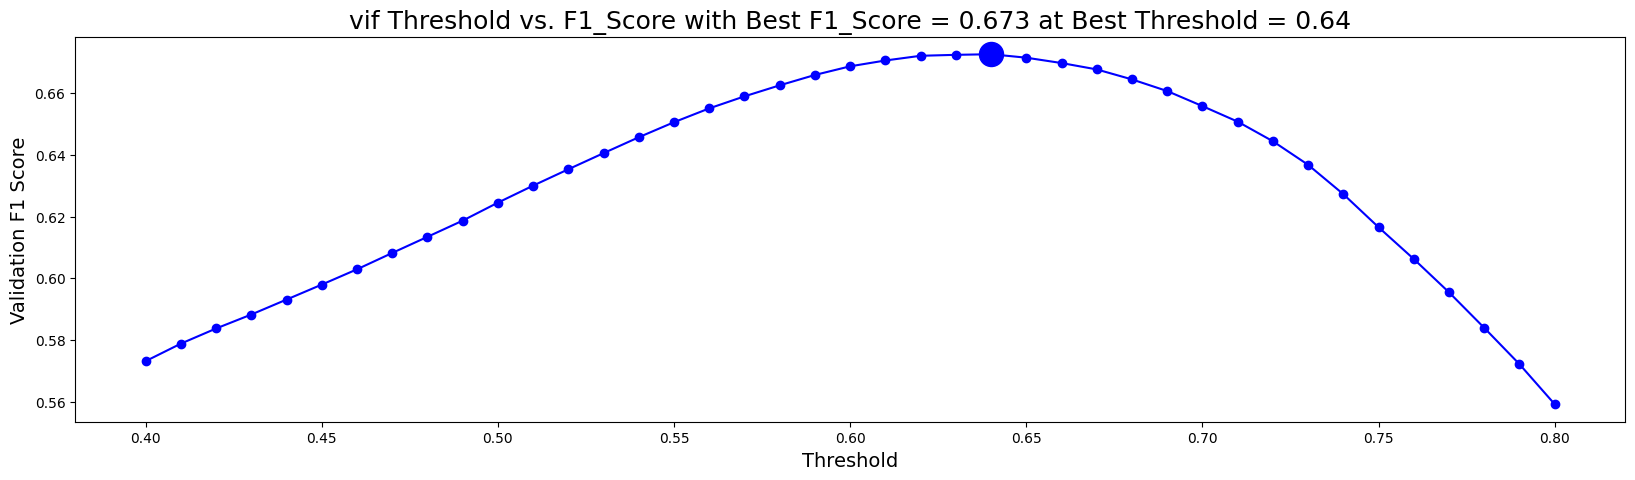

In [8]:
clf_vif.eval_()

In [9]:
clf_vif.f1()

When using optimal threshold...
Q1: F1 = 0.5667079481928378
Q2: F1 = 0.49463795470144134
Q3: F1 = 0.4829379622111523
Q4: F1 = 0.5536411625194385
Q5: F1 = 0.5084082700989621
Q6: F1 = 0.5895571254499832
Q7: F1 = 0.5662615887256908
Q8: F1 = 0.5197938454208022
Q9: F1 = 0.5815982937625722
Q10: F1 = 0.36872384620219056
Q11: F1 = 0.5844876687565458
Q12: F1 = 0.46412885682264826
Q13: F1 = 0.42025490871512233
Q14: F1 = 0.5946555677578801
Q15: F1 = 0.36036187979331885
Q16: F1 = 0.4402782259729115
Q17: F1 = 0.5335984326006915
Q18: F1 = 0.48734796893017995
==> Overall F1 = 0.6726191928068026


## Model using train_dfs_std_PCA

In [10]:
train_dfs_std_pca = pd.concat(list(train_dfs_std_pca.values()),axis=0)
train_dfs_std_pca.sort_index()

,level_group,PC1,PC2,PC3,PC4,PCA5,PCA6,PCA7,PCA8
session_id,,,,,,,,,
20090312431273200,0-4,-0.377238,3.243531,-0.064443,0.225996,-1.998894,-1.068821,-1.390852,-0.023556
20090312431273200,13-22,3.389079,0.494591,-1.460651,0.779441,0.239163,0.037290,-0.341602,-0.228984
20090312431273200,5-12,2.593357,0.068804,-0.615491,0.708380,-0.305940,-0.713534,0.240895,-0.803303
20090312433251036,0-4,0.868446,-1.420645,-0.611651,-2.482628,-0.549174,1.176884,-0.800145,-0.626824
20090312433251036,13-22,-2.584098,1.403760,0.755186,0.875735,-1.771781,0.331121,2.830981,-0.484396
...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,0.515955,-1.841131,1.857991,-2.789697,0.844123,-0.923586,-1.132844,-0.411511
22100219442786200,5-12,0.620648,-2.897973,1.290353,-0.925083,0.510969,-0.656993,-0.966286,-0.492499
22100221145014656,5-12,-1.613143,0.900163,0.660308,-0.303388,-0.864094,-0.182560,0.596654,1.067851


In [11]:
clf_pca = Ranfor_pspfgp()

In [12]:
%%time

clf_pca.fit(train_dfs_std_pca, targets,name="pca")

#########################
### Fold 1
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 2
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 3
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 4
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 5
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
CPU times: total: 3min 49s
Wall time: 3min 49s


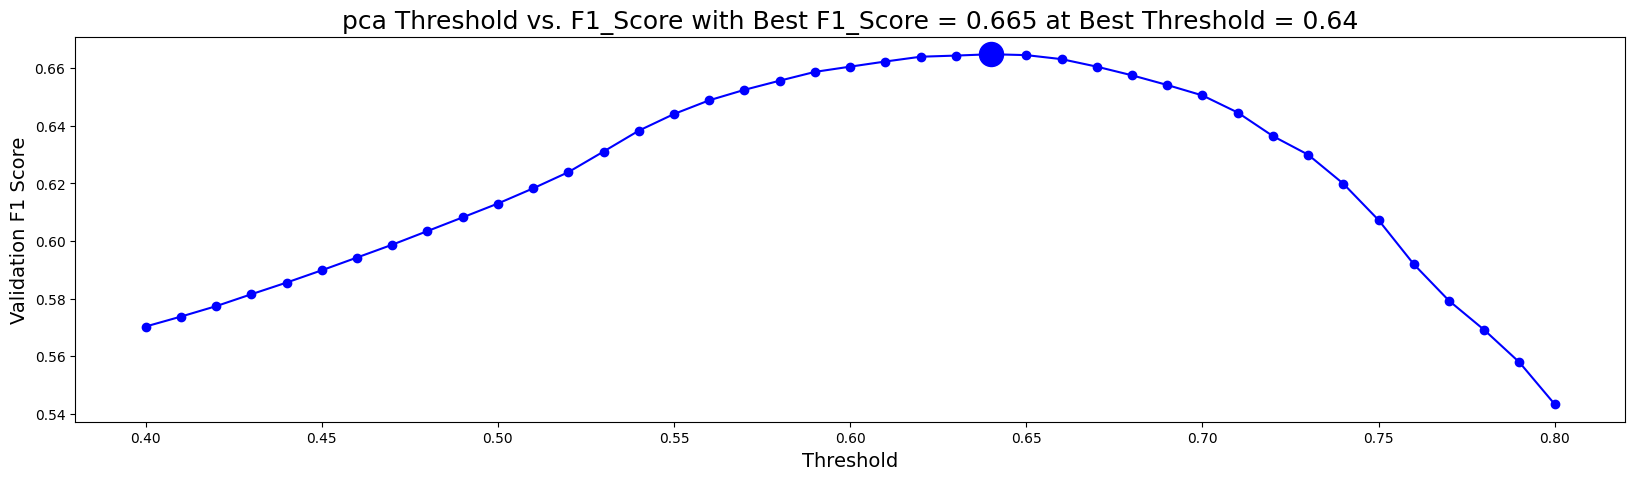

In [13]:
clf_pca.eval_()

In [14]:
clf_pca.f1()

When using optimal threshold...
Q1: F1 = 0.5303699857135057
Q2: F1 = 0.4946162755780532
Q3: F1 = 0.4829152676278886
Q4: F1 = 0.537578443402855
Q5: F1 = 0.4384948302508866
Q6: F1 = 0.5638331197220401
Q7: F1 = 0.5445212845629305
Q8: F1 = 0.5059266231591983
Q9: F1 = 0.5606263455589475
Q10: F1 = 0.33213707291187233
Q11: F1 = 0.5670689752738752
Q12: F1 = 0.4634775666856351
Q13: F1 = 0.42025490871512233
Q14: F1 = 0.5627972442083806
Q15: F1 = 0.3416596814752724
Q16: F1 = 0.44442770844387464
Q17: F1 = 0.49757280602770937
Q18: F1 = 0.48734796893017995
==> Overall F1 = 0.6648828272784433


## Model using train_dfs_min_max

In [15]:
train_dfs_min_max = pd.concat(list(train_dfs_min_max.values()),axis=0)
train_dfs_min_max.sort_index()

,level_group,event_name_nunique,fqid_nunique,room_fqid_nunique,text_nunique,elapsed_time_mean,level_mean,page_mean,room_coor_x_mean,room_coor_y_mean,...,navigate_click_sum,person_click_sum,cutscene_click_sum,object_click_sum,map_hover_sum,notification_click_sum,map_click_sum,observation_click_sum,checkpoint_sum,elapsed_time_sum
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,0.75,0.454545,1.000000,0.500000,0.303929,0.488587,0.000000,0.475571,0.396077,...,0.474576,0.625000,0.181818,0.217391,0.666667,0.111111,0.008333,0.571429,0.333333,0.275041
20090312431273200,13-22,0.50,0.263158,0.000000,0.242857,0.272340,0.247621,0.672727,0.465605,0.569862,...,0.204396,0.473684,0.148936,0.224490,0.254545,0.044444,0.006061,0.000000,0.000000,0.165203
20090312431273200,5-12,0.50,0.200000,0.333333,0.305085,0.274705,0.418475,0.000000,0.548904,0.441038,...,0.258373,0.263889,0.200000,0.170455,0.300000,0.015625,0.006536,0.000000,0.000000,0.179508
20090312433251036,0-4,1.00,0.363636,0.500000,0.181818,0.346100,0.392133,0.500000,0.135113,0.486854,...,0.203390,0.375000,0.545455,0.391304,0.500000,0.000000,0.016667,0.285714,0.333333,0.263627
20090312433251036,13-22,1.00,0.526316,0.500000,0.457143,0.654184,0.488783,0.754545,0.819475,0.668064,...,0.323077,0.763158,0.255319,0.306122,0.345455,0.088889,0.242424,0.666667,0.000000,0.324579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,1.00,0.363636,0.500000,0.318182,0.315935,0.396956,0.666667,0.244900,0.071257,...,0.474576,0.500000,0.363636,0.130435,0.166667,0.111111,0.016667,0.142857,0.333333,0.289374
22100219442786200,5-12,1.00,0.333333,0.333333,0.169492,0.297345,0.461872,0.708333,0.475557,0.194442,...,0.172249,0.138889,0.000000,0.113636,0.333333,0.015625,0.004902,0.000000,0.000000,0.182472
22100221145014656,5-12,1.00,0.733333,0.666667,0.661017,0.439401,0.633347,0.602273,0.653707,0.507021,...,0.746411,0.680556,0.200000,0.227273,0.400000,0.015625,0.009804,0.200000,0.000000,0.335324


In [16]:
clf_mm = Ranfor_pspfgp()

In [17]:
%%time

clf_mm.fit(train_dfs_min_max, targets,name="min_max")

#########################
### Fold 1
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 2
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 3
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 4
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
#########################
### Fold 5
#########################
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
CPU times: total: 3min 6s
Wall time: 3min 6s


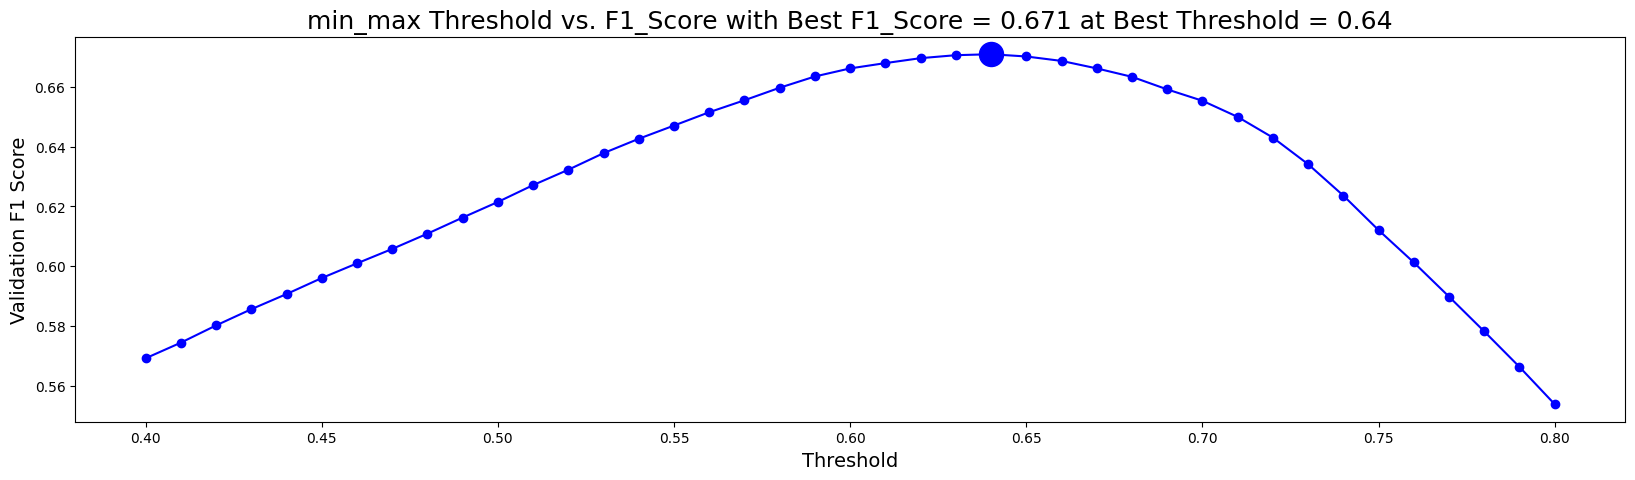

In [18]:
clf_mm.eval_()

In [19]:
clf_mm.f1()

When using optimal threshold...
Q1: F1 = 0.5486289937956946
Q2: F1 = 0.49464879356568364
Q3: F1 = 0.4829379622111523
Q4: F1 = 0.5358130631806789
Q5: F1 = 0.4978497721348787
Q6: F1 = 0.5667841038811854
Q7: F1 = 0.5564166445678088
Q8: F1 = 0.5202083430969645
Q9: F1 = 0.5624532352594821
Q10: F1 = 0.3558211483549445
Q11: F1 = 0.5775682804393506
Q12: F1 = 0.4632068164213788
Q13: F1 = 0.42025490871512233
Q14: F1 = 0.593343189274096
Q15: F1 = 0.34681013900488067
Q16: F1 = 0.44748658909692685
Q17: F1 = 0.5248945287569727
Q18: F1 = 0.48734796893017995
==> Overall F1 = 0.6710023400918427
